<a href="https://colab.research.google.com/github/AI-FREE-Team/Machine-Learning-Basic/blob/master/Materials/%E8%A6%96%E8%A6%BA%E5%8C%96_%E9%95%B7%E6%A2%9D%E5%9C%96_%E5%9C%93%E9%A4%85%E5%9C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo](https://raw.githubusercontent.com/AI-FREE-Team/Machine-Learning-Basic/main/README_imgs/aifreeteam.png) 
<center>Welcome to the course《Python: from business analytics to Artificial Intelligence》by AI . FREE Team.</center>
<center>歡迎大家來到 AI . FREE Team 《Python 從商業分析到人工智慧》的第二堂課 - 機器學習(ML)基礎教學。 </center>
<br/>

<center>作者: Michelle Chuang (<a href="https://github.com/sueshow">Github</a>)</center>
<center>AI . FREE Team: <a href="https://aifreeblog.herokuapp.com/">https://aifreeblog.herokuapp.com/</a></center>
<br>

# 前言

本文開始帶領大家以視覺化的統計圖表探索資料，將介紹 <font color="#00dd00">**Bar Chart**</font> 和 <font color="#00dd00">**Pie Plot**</font> ，讓大家瞭解如何善用統計圖表說明資料。在開始之前別忘了匯入中文字型喔！要先把檔案放到右側 file 夾中，確認上傳完成後再執行下面的語法

In [ ]:
import matplotlib as mpl

mpl.font_manager.fontManager.addfont( 'taipei_sans_tc_beta.ttf' )
mpl.rc( 'font', family='Taipei Sans TC Beta' )

## 匯入基本套件

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt   # 繪製影像 
import seaborn as sns

print( 'NumPy 版本: ', np.__version__ )
print( 'Pandas 版本: ', pd.__version__ )  
print( 'Matplotlib 版本: ', matplotlib.__version__ )
print( 'Seaborn 版本: ', sns.__version__ )

NumPy 版本:  1.19.5
Pandas 版本:  1.1.5
Matplotlib 版本:  3.2.2
Seaborn 版本:  0.11.1


# 長條圖 (Bar Chart)

長條圖 (Bar Chart) 能用來描述類別資料的次數分配情況，或計量的高低比較，如：不同公司的營收、不同國家的染疫人數等。

## 實際應用：COVID-19

In [ ]:
#@markdown 資料來源: [Our World in Data](https://ourworldindata.org/grapher/full-list-cumulative-total-tests-per-thousand-bar-chart?country=JPN~USA~GBR~CHN~IDN~IND~TWN~KOR~SGP~DEU~HKG)

from IPython.core.display import HTML

HTML('<iframe src="https://ourworldindata.org/grapher/full-list-cumulative-total-tests-per-thousand-bar-chart?country=JPN~USA~GBR~CHN~IDN~IND~TWN~KOR~SGP~DEU~HKG" loading="lazy" style="width: 100%; height: 600px; border: 0px none;"></iframe>')

## 小範例

使用 [`matplotlib.pyplot.bar( x, height, align, width, color, tick_label )`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) 函數繪製**垂直**長條圖，常用的參數說明如下：
  * x：x 軸的類別型態資料  
  * height：y 軸的數值型態資料
  * align：x 軸各類別資料對齊長條圖的方式，兩種對齊方式分別為：  
    * 'edge'：對齊長條圖下緣的左端點
    * 'center'(預設)：對齊長條圖下緣的中心點
  * width：長條圖的寬度 
  * color：長條圖的顏色  
  * tick_label：x 軸類別型態資料的相對應標籤，預設為 None  

另外， [`matplotlib.pyplot.barh( )`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html) 函數則用來繪製水平長條圖，其常用的參數說明與垂直長條圖相同。    

### 垂直長條圖 Vertical Bar Chart

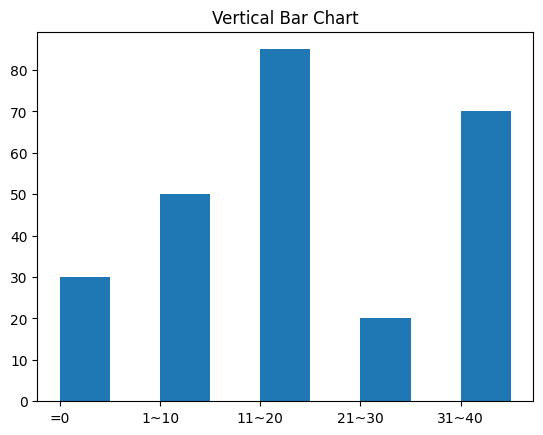

In [ ]:
plt.style.use( 'default' )
# Data 
x = ['A','B','C','D','E']
y = [30,50,85,20,70]  
xlabel = ['=0','1~10','11~20','21~30','31~40']
bar_width = 0.5

plt.bar( x, y, align='edge', tick_label=xlabel, width=bar_width)
plt.title('Vertical Bar Chart')
plt.show()

### 水平長條圖 Horizontal Bar Chart

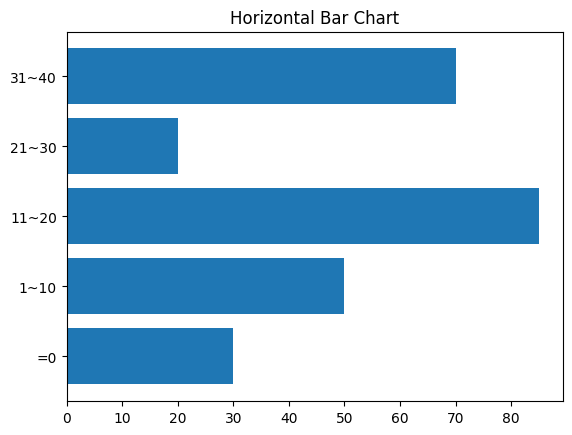

In [ ]:
plt.barh( x, y, tick_label=xlabel )
plt.title('Horizontal Bar Chart')
plt.show()

### 累積長條圖

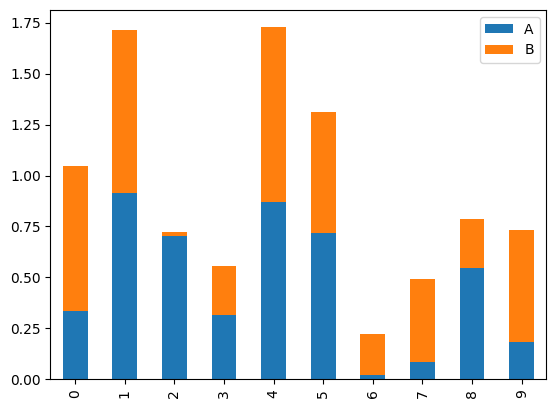

In [ ]:
df = pd.DataFrame(np.random.rand(10,2), columns=['A', 'B'])
df.plot.bar(stacked=True)
plt.show()

## 實作範例 - 台灣 COVID-19 縣市鄉鎮疫情表單

* 資料來源 : [COVID-19 全球疫情地圖](https://covid-19.nchc.org.tw/dt_005-covidTable_taiwan.php?downloadall=yes) [台灣 COVID-19 縣市鄉鎮疫情表單](https://covid-19.nchc.org.tw/city_confirmed.php?downloadall=yes) 
* 下載時間 : 2021/06/14 06:15 PM

### Step 1：匯入資料

首先，透過程式碼將資料集檔案 (excel) 從 GitHub 下載

In [ ]:
!git clone https://github.com/AI-FREE-Team/Machine-Learning-Basic.git

Cloning into 'Machine-Learning-Basic'...
remote: Enumerating objects: 291, done.
remote: Counting objects: 100% (291/291), done.
remote: Compressing objects: 100% (236/236), done.
remote: Total 291 (delta 130), reused 153 (delta 48), pack-reused 0
Receiving objects: 100% (291/291), 28.75 MiB | 20.54 MiB/s, done.
Resolving deltas: 100% (130/130), done.


In [ ]:
#若需要重新下載資料，先執行下面的語法：
#!rm -r /content/Machine-Learning-Basic

In [ ]:
# 匯入 xlsx 檔
raw_data02 = pd.read_excel( '/content/Machine-Learning-Basic/Content/COVID-19/台灣COVID-19縣市鄉鎮疫情表單.xlsx', header=1 )
raw_data02.head()

,id,個案研判日,縣市,鄉鎮,性別,是否為境外移入,年齡層
0,175,2021-06-13,花蓮縣,新城鄉,女,否,15-19
1,174,2021-06-13,桃園市,龜山區,男,否,55-59
2,173,2021-06-13,桃園市,龜山區,男,否,45-49
3,172,2021-06-13,桃園市,龜山區,女,否,5-9
4,171,2021-06-13,桃園市,蘆竹區,男,否,55-59


In [ ]:
# 檢視各欄位的資料型態
raw_data02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12921 entries, 0 to 12920
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       12921 non-null  int64 
 1   個案研判日    12921 non-null  object
 2   縣市       12921 non-null  object
 3   鄉鎮       12921 non-null  object
 4   性別       12921 non-null  object
 5   是否為境外移入  12921 non-null  object
 6   年齡層      12921 non-null  object
dtypes: int64(1), object(6)
memory usage: 706.7+ KB


In [ ]:
print( f'原始資料長相：{raw_data02.shape}\n' )
print( f'每個欄位缺失值的總數：\n{raw_data02.isnull( ).sum()}\n' )

原始資料長相：(12921, 7)

每個欄位缺失值的總數：
id         0
個案研判日      0
縣市         0
鄉鎮         0
性別         0
是否為境外移入    0
年齡層        0
dtype: int64



發現資料很齊全，不需要進行資料的缺漏值處理

### Step 2：資料處理

#### 01、樞紐分析
依【縣市】欄位中的縣市別，統計各縣市的個案總數：

In [ ]:
# 統計各縣市的個案總數
summary = raw_data02[['縣市']].groupby(['縣市']).size()

In [ ]:
# Series 轉成 DataFrame 資料結構
summary = pd.DataFrame( summary )
summary.reset_index( inplace=True ) 

In [ ]:
# 重新定義 DataFrame 欄位名稱
summary.columns = ['縣市','個案總數'] 
summary

,縣市,個案總數
0,南投縣,31
1,台中市,178
2,台北市,3935
3,台南市,40
4,台東縣,22
5,嘉義市,9
6,嘉義縣,17
7,基隆市,249
8,境外移入,1208
9,宜蘭縣,92


In [ ]:
# 由小到大排序 '個案總數' 欄位
summary.sort_values( '個案總數', inplace=True )

### Step 3：繪圖

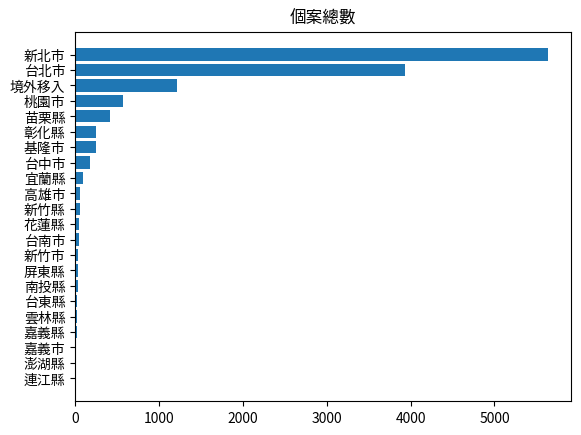

In [ ]:
# 水平長條圖 Horizontal Bar Chart
plt.barh( summary['縣市'], summary['個案總數'] )

# 圖標題
plt.title( '個案總數' )
plt.show()

# 圓餅圖 (Pie Chart)

圓餅圖 (Pie Chart) 可用來描述資料的數量、頻率或佔比等的相對關係，如：各類商品的銷售量、新冠肺炎確診的年齡層族群等。

## 實際應用：Coronavirus_cases_by_age

![Pie Chart](https://raw.githubusercontent.com/AI-FREE-Team/Machine-Learning-Basic/main/Content/(Pie_Chart)_Coronavirus_cases_by_age.png)

資料來源：[Eight weeks of coronavirus in India through data: Is the growth really exponential ?](https://citizenmatters.in/is-coronavirus-growing-exponentially-in-india-8-weeks-of-coronavirus-through-data-16902)

## 小範例

使用 [`matplotlib.pyplot.pie( x, labels, colors, autopct, explode, radius, center, counterclock, startangle )`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) 函數繪製垂直的直方圖，常用的參數說明如下：
  * x：資料 (1 維陣列)
  * labels：圓餅圖中每個扇形的標籤
  * colors：圓餅圖中每個扇形的顏色
  * autopct：圓餅圖中每個扇形所佔的比例格式，例如 : '%2.1%%' 表示整數2位數，小數 1 位數
  * explode：設定圓餅圖中分離出的扇形距離
  * radius：圓餅圖的半徑，預設為 `radius=1`
  * center：圓餅圖的中心點座標，預設為原點 $(0,0)$
  * counterclock：圓餅圖中扇形的呈現順序是否為逆時針，預設為 `counterclock=True`
  * startangle：圓餅圖的起始角度，預設為 `startangle=0`

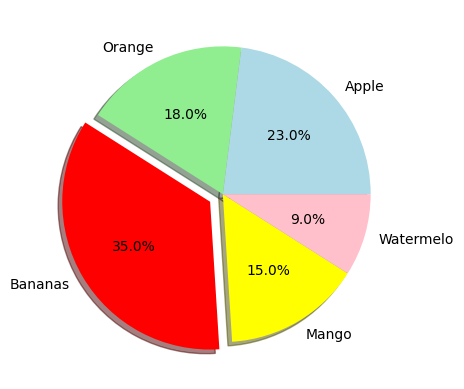

In [ ]:
plt.style.use( 'default' )
# Data 
Products = ['Apple','Orange','Bananas','Mango','Watermelo']
Amount = [23,18,35,15,9] 

# 圓餅圖 Pie Chart
Colors = ['lightblue','lightgreen','red','yellow','pink']
plt.pie( x=Amount, labels=Products, colors=Colors, autopct='%2.1f%%', explode=(0,0,0.1,0,0), shadow=True )
plt.show()

## 實作範例 - 鐵達尼號

### Step 1：匯入資料

要記得先把資料集檔案 (csv) 從 GitHub 下載下來喔！可先參考「折線圖/趨勢圖」的 Step 1，在此就不重複說明囉！

* 資料來源：自 Kaggle 上 [鐵達尼號生存預測比賽](https://www.kaggle.com/c/titanic/overview/description) 取得，鐵達尼號已成為歷史上最著名的船舶之一。
<br>
* 資料說明：1912 年 4 月 10 日，鐵達尼號展開首航，也是唯一一次的載客出航，最終目的地為紐約。部分乘客為當時世界上頂尖富豪，以及許多來自英國、愛爾蘭、斯堪地那維亞和歐洲其他地區的移民，他們尋求在美國展開新生活的機會。4月15日在中途發生擦撞冰山後沉沒的嚴重災難。2,224 名船上人員中有 1,514 人罹難，成為近代史上最嚴重的和平時期船難。船長愛德華·約翰·史密斯最終與船一起沉沒，鐵達尼號總設計師湯瑪斯·安德魯斯也在這起災難中死亡。

In [ ]:
#鐵達尼號 from kaggle
titanic_train = pd.read_csv( '/content/Machine-Learning-Basic/Content/Titanic/train.csv' )
titanic_test = pd.read_csv( '/content/Machine-Learning-Basic/Content/Titanic/test.csv' )
titanic_submit = pd.read_csv( '/content/Machine-Learning-Basic/Content/Titanic/gender_submission.csv' )

In [ ]:
# 合併 train 及 test 的資料 
titanic_data = titanic_train.append( titanic_test, sort=False )
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2：資料處理

#### 01、計算生還者的比率(Survival Ratio)

In [ ]:
Survived_Counts = titanic_data['Survived'].value_counts().reset_index()
Survived_Counts.columns = ['Survived','Counts']
Survived_Counts

,Survived,Counts
0,0.0,549
1,1.0,342


#### 02、轉換標題

In [ ]:
level = { 0:'Death', 1:'Survive' }
titanic_data['Survived Note'] = titanic_data['Survived'].map(level)

### Step 3：繪圖

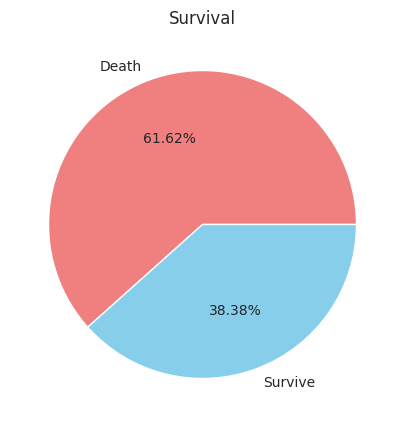

In [ ]:
sns.set_style('darkgrid')

plt.figure( figsize=(10,5) )
titanic_data['Survived Note'].value_counts().plot(kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%')

plt.title('Survival')  # 圖標題
plt.ylabel('')
plt.show()

# 結論

如同 Wikipedia 所述，有效的視覺化可以幫助用戶分析和推理資料和證據。它使複雜的資料更容易理解、理解和使用。當日後在進行資料分析時，建議讀者官方文件 (Matplotlib Tutorial](https://matplotlib.org/stable/tutorials/index.html) 及 [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html) 尋找方法，以累積程式除錯的能力與經驗。<br>
視覺化將是探索式資料分析(Exploratory Data Analysis；EDA)的過程中重要工具之一，我們可依據各資料的特性來選用適合的圖示來進行視覺化，本文介紹長條圖、圓餅圖來觀察資料，讀者可透過瞭解資料特性後選擇適合呈現的樣式，讓數據透過視覺化說話。<br>
針對本文的內容，若讀者們有發現任何的錯誤或疑問，非常歡迎您 [來信 sueshow2006@gmail.com](mailto:sueshow2006@gmail.com) 給予建議及討論，讓我們一同來學習成長！

# 參考資料

* [Select by partial string from a pandas DataFrame](https://stackoverflow.com/questions/11350770/select-by-partial-string-from-a-pandas-dataframe)
* [Titanic - Feature understanding from Plots](https://www.kaggle.com/saisivasriram/titanic-feature-understanding-from-plots)
* [Titanic Analysis_Learning to Swim with Python](https://www.kaggle.com/sgus1318/titanic-analysis-learning-to-swim-with-python)
* [python pandas pivot_table count frequency in one column](https://stackoverflow.com/questions/22412033/python-pandas-pivot-table-count-frequency-in-one-column)  
* [matplotlib (上)](https://blog.csdn.net/bryant_meng/article/details/80980820)
* [matplotlib and seaborn (下)](https://blog.csdn.net/bryant_meng/article/details/86383749)
* [How to delete the last row of data of a pandas dataframe](https://stackoverflow.com/questions/26921651/how-to-delete-the-last-row-of-data-of-a-pandas-dataframe) 
* [如何在 Colab 中透過 Kaggle API 下載資料集](https://blog.toright.com/posts/6817/%E5%A6%82%E4%BD%95%E5%9C%A8-colab-%E4%B8%AD%E9%80%8F%E9%81%8E-kaggle-api-%E4%B8%8B%E8%BC%89%E8%B3%87%E6%96%99%E9%9B%86.html)

# 返回 [課程大綱](https://github.com/AI-FREE-Team/Machine-Learning-Basic#%E8%AA%B2%E7%A8%8B%E5%A4%A7%E7%B6%B1-course-outline)